In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline


In [2]:
df = pd.read_csv("properties_cleaned.csv")
print(df.shape)
df.head()


(11338, 150)


C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_8120\124462766.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("properties_cleaned.csv")


,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Flooring Type,Electricity Status,...,Ownership Type_Freehold,Ownership Type_Leasehold,Ownership Type_Power Of Attorney,furnished Type_Semi-Furnished,furnished Type_Unfurnished,Transaction Type_Other,Transaction Type_Rent,Transaction Type_Rent/Lease,Transaction Type_Resale,isPrimeLocationProperty_Y
0,Under Construction,Dec '25,5.0,N,NaN,KDMC,1.0,3150000.0,Vitrified,No/Rare Powercut,...,True,False,False,False,True,False,False,False,False,True
1,Ready to Move,NaN,20.0,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,Vitrified,No/Rare Powercut,...,True,False,False,False,True,False,False,False,False,True
2,Ready to Move,NaN,18.0,N,Sai Satyam Developers,KDMC,0.0,5400000.0,Vitrified,No/Rare Powercut,...,True,False,False,False,True,False,False,False,False,True
3,Under Construction,Dec '25,5.0,N,Birla Estates,KDMC,70.0,9000000.0,Vitrified,No/Rare Powercut,...,True,False,False,False,True,False,False,False,False,True
4,Under Construction,Dec '24,8.0,Y,Godrej Properties,NaN,NaN,4950000.0,NaN,NaN,...,True,False,False,True,False,False,False,False,False,True


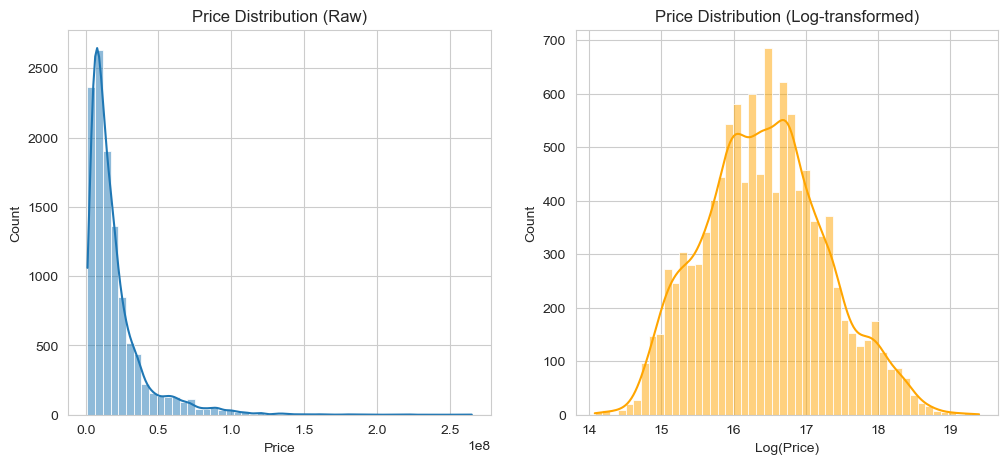

In [3]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Price Distribution (Raw)")
plt.xlabel("Price")

plt.subplot(1,2,2)
sns.histplot(np.log1p(df["Price"]), bins=50, kde=True, color='orange')
plt.title("Price Distribution (Log-transformed)")
plt.xlabel("Log(Price)")

plt.show()


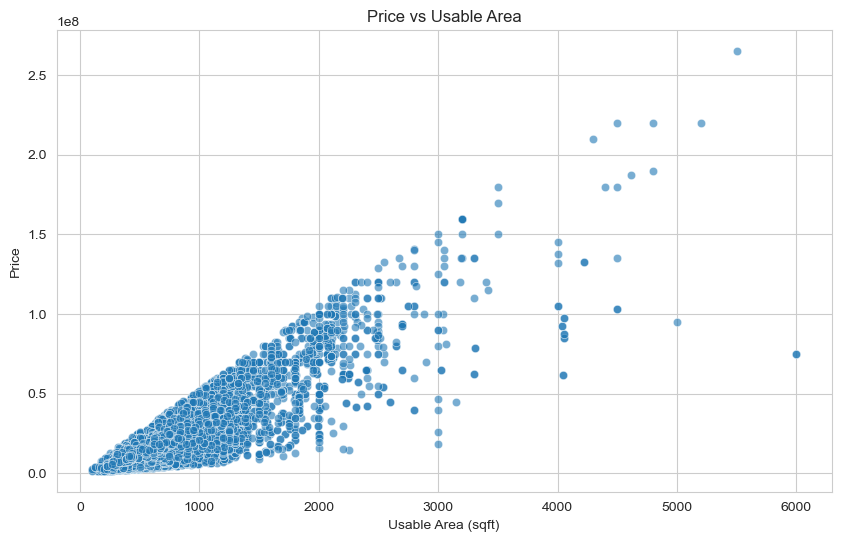

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="usable_area_sqft", y="Price", data=df, alpha=0.6)
plt.title("Price vs Usable Area")
plt.xlabel("Usable Area (sqft)")
plt.ylabel("Price")
plt.show()


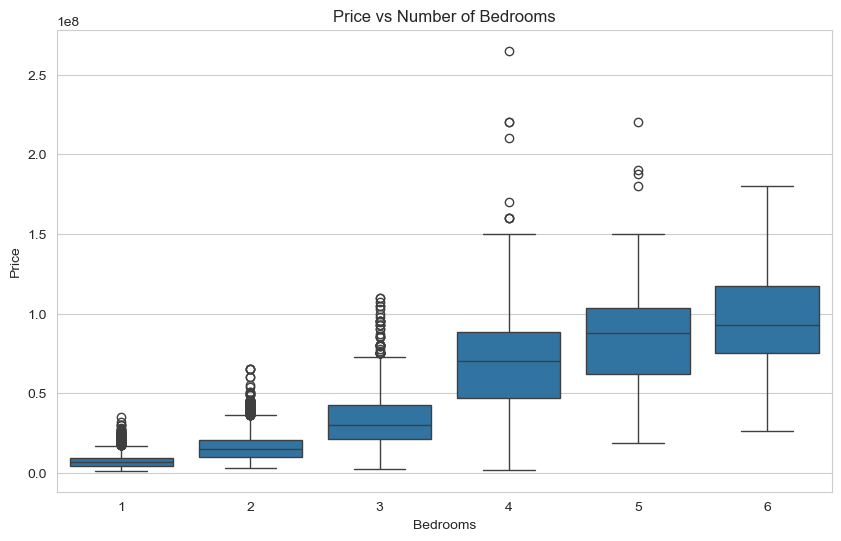

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(x="bedroom", y="Price", data=df)
plt.title("Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


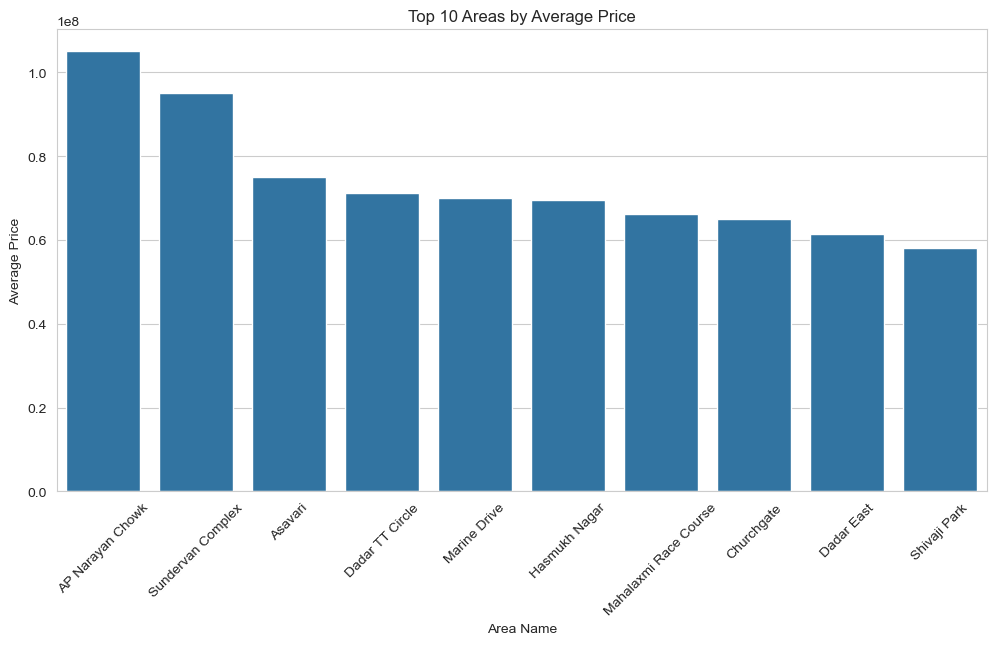

In [6]:
area_mean_price = df.groupby("Area Name")["Price"].mean()

top_areas = area_mean_price.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_areas.index, y=top_areas.values)
plt.xticks(rotation=45)
plt.title("Top 10 Areas by Average Price")
plt.ylabel("Average Price")
plt.show()


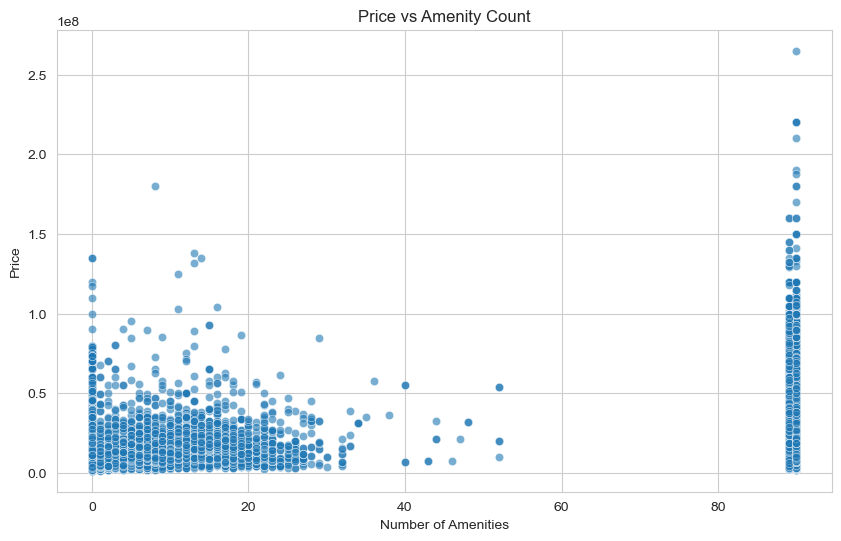

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="amenity_count", y="Price", data=df, alpha=0.6)
plt.title("Price vs Amenity Count")
plt.xlabel("Number of Amenities")
plt.ylabel("Price")
plt.show()


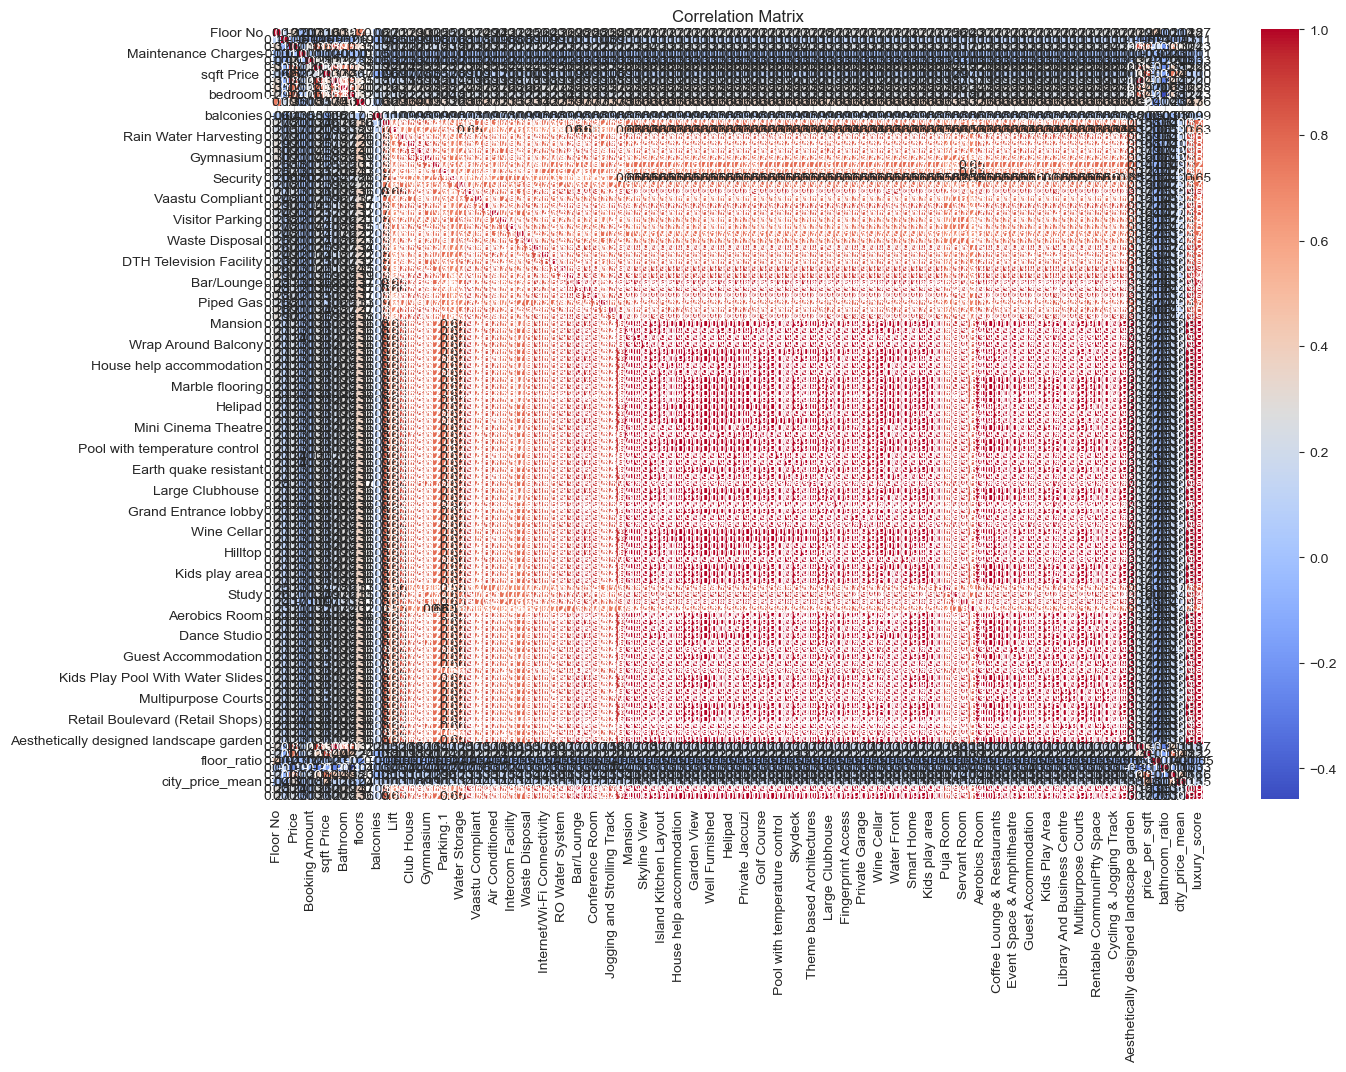

In [8]:
numeric_cols = df.select_dtypes(include=["float64","int64"]).columns
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


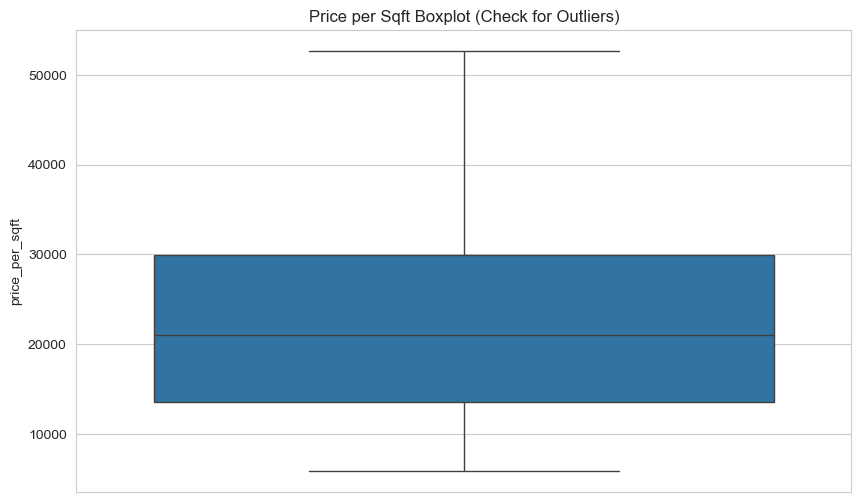

In [9]:
df["price_per_sqft"] = df["Price"] / df["usable_area_sqft"]

plt.figure(figsize=(10,6))
sns.boxplot(y="price_per_sqft", data=df)
plt.title("Price per Sqft Boxplot (Check for Outliers)")
plt.show()
